# Iris Plants Dataset

Um dos bancos mais usados para iniciar os estudos de reconhecimento de padrão.
Banco possui 3 classes, cada uma com 50 amostras.

In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [4]:
dataset = pd.read_csv('iris.data', header=None)

In [5]:
dataset.shape

(150, 5)

In [8]:
dataset.isna().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

O banco não apresenta valores nulos


In [9]:
dataset.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Visialização da descrição apenas de valores não numericos

In [11]:
dataset.describe(include=[np.object])

,4
count,150
unique,3
top,Iris-versicolor
freq,50


Visialização da descrição de todos os tipos de variáveis

In [12]:
dataset.describe(include='all')

,0,1,2,3,4
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-versicolor
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


## Divisão do banco: train/test

In [58]:
X = pd.DataFrame(dataset.iloc[:,:-1])
Y = pd.DataFrame(dataset.iloc[:, -1])

encoder_y = LabelEncoder() 
Y = pd.DataFrame( encoder_y.fit_transform(Y))

print(X.shape, Y.shape)
print(type(X), type(Y))

(150, 4) (150, 1)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


C:\Users\igor.lucena\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [59]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [60]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(120, 4) (120, 1)
(30, 4) (30, 1)


### Analisando os dados 

A partir daqui só usamos os dados do treino.

Devemos assumir que é o úncio dado que temos. Os dados do teste debem ser usado para isso: TESTAR

In [72]:
y_train.columns = ['label']
corr = pd.concat([x_train, y_train ], axis=1).corr()
corr.style.background_gradient(cmap='coolwarm')

,0,1,2,3,label
0,1,-0.0731665,0.86225,0.814916,0.773212
1,-0.0731665,1,-0.407651,-0.348286,-0.419842
2,0.86225,-0.407651,1,0.96617,0.94801
3,0.814916,-0.348286,0.96617,1,0.958239
label,0.773212,-0.419842,0.94801,0.958239,1


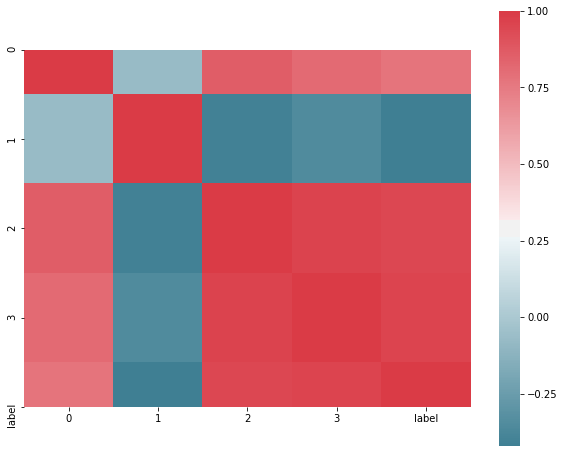

In [76]:
import seaborn as sns
import matplotlib.pyplot as pl
f, ax = pl.subplots(figsize=(10, 8))
corr = pd.concat([x_train, y_train ], axis=1).corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

C:\Users\igor.lucena\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\igor.lucena\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


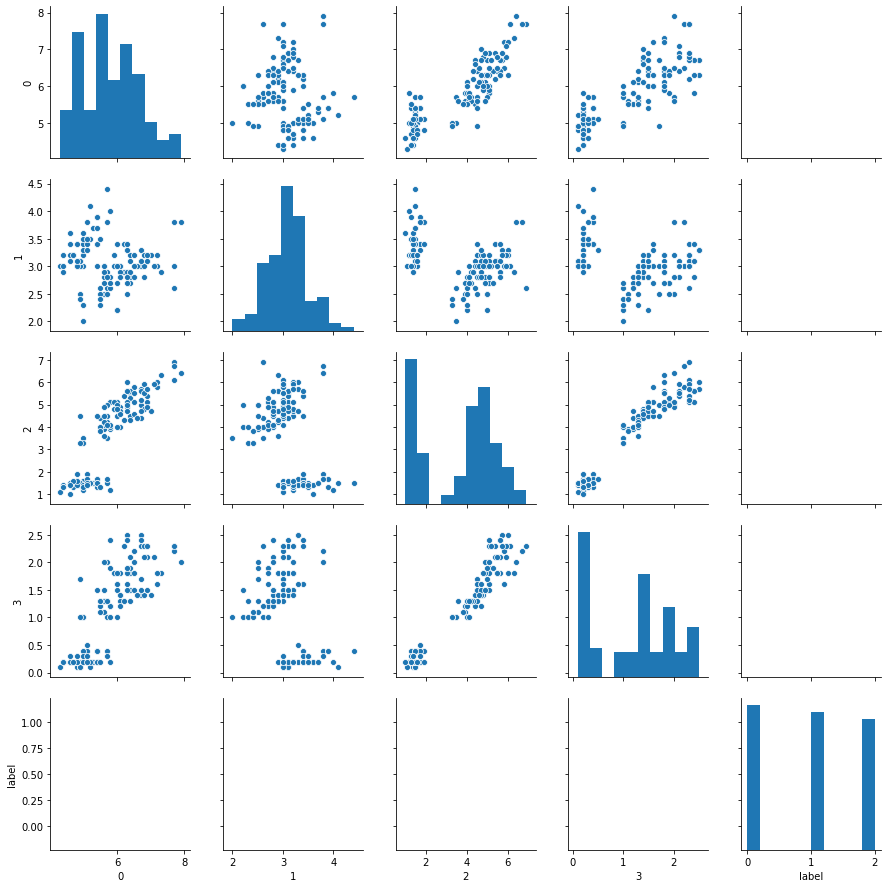

In [81]:
# Basic correlogram
sns.pairplot(pd.concat([x_train, y_train]))

In [82]:
x_train.describe()

,0,1,2,3
count,120.000000,120.000000,120.000000,120.00000
mean,5.804167,3.070833,3.679167,1.16750
std,0.824050,0.413307,1.756280,0.77255
min,4.300000,2.000000,1.000000,0.10000
25%,5.100000,2.800000,1.500000,0.27500
50%,5.700000,3.000000,4.250000,1.30000
75%,6.400000,3.300000,5.100000,1.80000
max,7.900000,4.400000,6.900000,2.50000


## Feature Scaling

Pré-processamento dos dados 

In [83]:
from sklearn.preprocessing import StandardScaler, Normalizer, MaxAbsScaler, MinMaxScaler, RobustScaler

In [87]:
scaler = StandardScaler()# alterar
x_train_norm =  pd.DataFrame(scaler.fit_transform(x_train)) 

In [93]:
x_train_norm.describe().round(3)

,0,1,2,3
count,120.000,120.000,120.000,120.000
mean,0.000,0.000,-0.000,-0.000
std,1.004,1.004,1.004,1.004
min,-1.833,-2.602,-1.532,-1.388
25%,-0.858,-0.658,-1.246,-1.160
50%,-0.127,-0.172,0.326,0.172
75%,0.726,0.557,0.812,0.822
max,2.554,3.229,1.842,1.732


**O objeto usado para escalar os valores no treinamento deve ser guardado pois o mesmo processo deve ser aplicado ao conjunto de teste**

## Treinamento 


In [94]:
from sklearn.ensemble import RandomForestClassifier

In [97]:
rf = RandomForestClassifier()
rf.fit(x_train_norm, y_train)

pred = rf.predict(x_train_norm)
print('accuracy', accuracy_score(y_train,pred))
print('precision', precision_score(y_train,pred))
print('recall', recall_score(y_train,pred))
print('f1', f1_score(y_train,pred))
confusion_matrix(y_train,pred)

C:\Users\igor.lucena\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\igor.lucena\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


NameError: name 'accuracy_score' is not defined